# **MNIST Dataseti ile Deep Learning Uygulaması**

## Load Data

In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("ilk datanin shape'i:", x_train[0].shape) # (28, 28)
print("ilk datanin icerigi:", y_train[0]) # 5

ilk datanin shape'i: (28, 28)
ilk datanin icerigi: 5


## Normalization

In [3]:
x_train_norm = x_train.reshape((60000, 28*28)) #Goruntuyu vektore donusturur
x_train_norm = x_train_norm.astype('float32') / 255 #Normalize eder
x_test_norm = x_test.reshape((10000, 28*28)) 
x_test_norm = x_test_norm.astype('float32') / 255

print("Normalizasyon sonrasi shape:", x_train_norm.shape) # (60000, 784)

Normalizasyon sonrasi shape: (60000, 784)


## Model

Devamında ağın yapısını tanımlamamız gerekiyor.

In [4]:
from keras import models
from keras import layers

`from keras.models import Sequential` gibi de kullanabiliriz.

Modeli kullanmadan önce `models.Sequential()` gibi tanımlamalıyız.

In [5]:
model = models.Sequential()

In [6]:
#Giris katmani
model.add(layers.Dense(32, 
                       activation='relu', 
                       input_shape=(28*28,)))

In [7]:
model.add(layers.Dense(32,
                       activation='relu'))

Çıkış katmanımızda 10 adet çıkış olmalı.  
0,1,2,3,4,5,6,7,8,9

Bu, **multi class classification** olarak geçer. Dolayısıyla çıkış katmanımızda activation function olarak **softmax** tercih ediyoruz.

**Binary Classification**'da ise genelde **sigmoid** tercih edilir.

In [8]:
#Cikis katmani
model.add(layers.Dense(10, #cikis sayisina esit olmali
                       activation="softmax"))

`categorical_crossentropy` kullanabilmemiz için, çıkış datalarımız olan *y_train* ve *y_test* datalarını categorical'a dönüştürmemiz gerekiyor.

Örneğin, **5** olarak değil **[0,0,0,0,0,1,0,0,0,0]** olarak modele vermemiz gerekiyor.

`sparse_categorical_crossentropy` bu işlemi kendisi yapar. `to_categorical` yapmamıza gerek kalmaz.

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(60000, 10)

In [11]:
y_train[0,:] # 5 vardi

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Optimizer olarak *Stochastic Gradient Descent (SGD)* kullanıyoruz.

Loss function olarak *Categorical Cross Entropy* kullanıyoruz.  
Problem tipi Regresyon ise genelde *mse, mae* gibi regresyon fonksiyonları kullanılır.  
Multi class classification'da ise *cross entropy* veya *sparse categorical cross entropy* kullanılır.

Metrics ise ekrana yazdıracağımız değeri belirtir.




In [12]:
model.compile(optimizer="sgd", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Modelin yapısını özet olarak görelim;

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Birinci katmanın çıkışı 32 olarak gözüküyor.  

Neden 25120 parametre var?  
Girişimiz 784 elemanlı.  
Her bir hücreden 784x32 adet *weights* bağlantısı var demektir.  
*Bias*'lar da var; 32 adet. (her bir hücre için 1 adet.)  
`784x32+32 = 25120` değiştirilebilir parametreye denk gelir.

İkinci katman hidden layer'dır.(dense_1)  
Bu katmanın giriş sayısı önceki katmanın çıkış sayısı kadardır yani 16.  
32x32 adet weights var 32 adet de bias var. Yani toplam;  
`32x32+32 = 1056` değiştirilebilir parametreye denk gelir.

Son katman, çıkış katmanımızdır. 10 adet hücre var.  
32x10 = 320 adet weights var, 10 adet de bias var.  
`32x10+10 = 330` değiştirilebilir parametreye denk gelir.

---

### Train

Sıradaki adımımız modeli eğitmek.

In [14]:
model.fit(x_train_norm, y_train, epochs=10, batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.5744 - accuracy: 0.8344
Epoch 2/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2687 - accuracy: 0.9230
Epoch 3/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2213 - accuracy: 0.9360
Epoch 4/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1921 - accuracy: 0.9449
Epoch 5/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1709 - accuracy: 0.9515
Epoch 6/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1546 - accuracy: 0.9559
Epoch 7/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1416 - accuracy: 0.9588
Epoch 8/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1304 - accuracy: 0.9625
Epoch 9/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1216 - accuracy: 0.9656
Epoch 10/10
3750/3750 [==============================] - 4s 1ms/step - loss: 0.113

Eğitilmiş ağın performansını ölçelim.

Eğitim bittikten sonra eğitimde kullanılmamış görüntülerle ağın başarımı belli olur.

In [15]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test) #test_images, test_labels

313/313 [==============================] - 0s 893us/step - loss: 0.1258 - accuracy: 0.9635


In [16]:
print("test_acc=", test_acc)
print("test_loss=", test_loss)

test_acc= 0.9635000228881836
test_loss= 0.12580308318138123


Eğitilen ağırlıklarımız bize %96.2 doğruluk sağladı.

Bizim eğittiğimiz şey aslında modelin ağırlıklarıdır.

In [17]:
W = model.get_weights()

In [18]:
W[0] #egitilmis katsayilar

array([[ 0.05216592, -0.04865834,  0.03654503, ...,  0.03217522,
         0.03828795, -0.02060882],
       [-0.00463822,  0.04893257,  0.08200658, ..., -0.03033052,
        -0.00364821,  0.00327453],
       [-0.0278175 , -0.07126219,  0.06784152, ..., -0.04191644,
         0.01705803,  0.08221578],
       ...,
       [ 0.07393975, -0.05837067,  0.06674417, ..., -0.00143821,
         0.08097332,  0.02086274],
       [ 0.01044305,  0.05597406,  0.00042134, ...,  0.03103415,
         0.01299696, -0.04913827],
       [-0.07908145,  0.04105467, -0.07807848, ...,  0.02346081,
        -0.0642796 , -0.04574802]], dtype=float32)

In [19]:
W[0].shape 

(784, 32)

İlk başta random üretilen kat sayılar öyle değerler almış ki bize yukarıdaki başarıyı sağladılar.  
Bu ağırlıkları kaydedersek weights'leri daha sonra tekrar kullanabiliriz. Modeli ve ağırlıkları saklamam lazım.  

Modeli kaydederken uzantısı genelde *.h5* olur.

In [20]:
# mnist_model.h5
model.save("/content/drive/Shareddrives/UnlimitedDrive/Works/Deep_Learning/ISE-DL/MNIST/mnist_model.h5")

Ağırlıkları da kaydedelim;

In [21]:
# mnist_weights.h5
model.save_weights("/content/drive/Shareddrives/UnlimitedDrive/Works/Deep_Learning/ISE-DL/MNIST/mnist_weights.h5")

Kaydettiğimiz modeli şu şekilde yeniden yükleyebiliriz;

```
from keras import models
model = models.load_model("mnist_model.h5")
```





---
### Predict


Şimdi eğittiğimiz modeli kullanacağız.  
Predict yapacağız.

Başlangıçta test verilerimize ve train verilerimize normalizasyon uygulamıştık;

```
x_test_norm = x_test.reshape((10000, 28*28)) 
x_test_norm = x_test_norm.astype('float32') / 255
```

Predict işlemine geçmeden önce dataları biraz inceleyelim.

In [22]:
x_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [23]:
#Gorsellestirme icin
import matplotlib.pyplot as plt
import numpy as np

In [24]:
inx = np.random.randint(0, 10000) #kullanmak istedigimiz test verisinin index'i

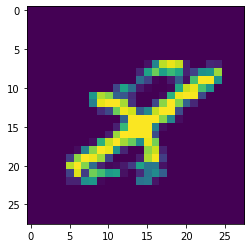

In [25]:
rakam = x_test[inx]
plt.imshow(rakam)

*rakam*'ın y_test'deki karşılığına bakalım;

`argmax()` fonksiyonu bize en büyük elemanın konumunu verir.

In [26]:
y=np.argmax(y_test[inx])
y

8

Predict yaparken normalize edilmiş verileri kullanmamız gerekiyor.  
Yani doğrudan `x_test` değil `x_test`'in normalize edilmiş halini kullanacağız.

In [27]:
rakam = x_test[inx]

In [28]:
pre = model.predict(rakam.reshape(1,784)/255)
pre

array([[4.5427732e-04, 4.7832649e-04, 1.4296563e-02, 1.6180912e-03,
        6.0430048e-03, 1.7559936e-03, 5.2074908e-04, 8.8442524e-05,
        9.7275847e-01, 1.9861273e-03]], dtype=float32)

In [29]:
tahmin_sonucu = np.argmax(pre)
print("Beklenen deger:.....", y)
print("Tahmin edilen deger:", tahmin_sonucu)

Beklenen deger:..... 8
Tahmin edilen deger: 8
